In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
info_job_level_dfs = {}
burstiness_gpu_level_dfs = {}
info_job_level_dfs["gpu_utilization"] = pd.read_csv("job_level_gpu_utilization.csv")
gputil_burstiness = pd.read_csv("burstiness_gpu_level_gpu_utilization.csv")

In [3]:
gputil_all = info_job_level_dfs["gpu_utilization"]

gputil_30 = gputil_all[gputil_all['mean_utilization'] <= 30]
gputil_30_70 = gputil_all[(gputil_all['mean_utilization'] > 30) & (gputil_all['mean_utilization'] < 70)]
gputil_70 = gputil_all[(gputil_all['mean_utilization'] >= 70) & (gputil_all['mean_utilization'] <= 100)]  

In [4]:
gputil_burstiness_grouped = gputil_burstiness.groupby("jobid").agg({'burstiness_score' : 'mean'}).reset_index()

In [5]:
gputil_burstiness_30 = gputil_burstiness_grouped[gputil_burstiness_grouped["jobid"].isin(list(gputil_30["jobid"]))].groupby("jobid").mean().reset_index()
gputil_burstiness_30_70 = gputil_burstiness_grouped[gputil_burstiness_grouped["jobid"].isin(list(gputil_30_70["jobid"]))].groupby("jobid").mean().reset_index()
gputil_burstiness_70 = gputil_burstiness_grouped[gputil_burstiness_grouped["jobid"].isin(list(gputil_70["jobid"]))].groupby("jobid").mean().reset_index()

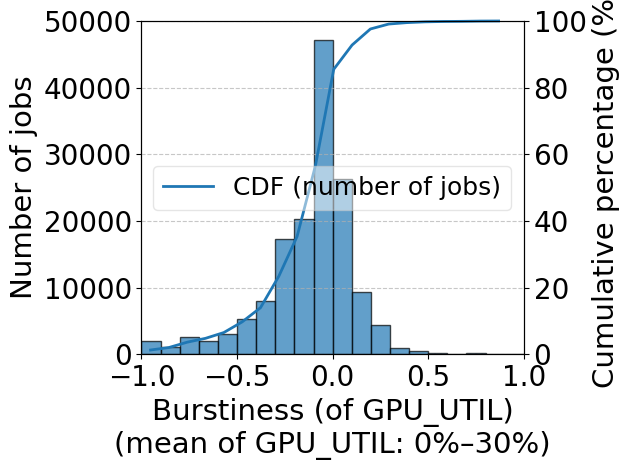

In [6]:
burstiness_values = gputil_burstiness_30["burstiness_score"].dropna()
hist_values, bin_edges = np.histogram(burstiness_values, bins=20)

cumulative_values = np.cumsum(hist_values)
cdf = (cumulative_values / cumulative_values[-1]) * 100

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

fig, ax1 = plt.subplots()
ax1.hist(burstiness_values, bins=20, range=(-1, 1), edgecolor='black', alpha=0.7)
ax1.set_xlabel("Burstiness (of GPU_UTIL)\n(mean of GPU_UTIL: 0%–30%)", fontsize=21)
ax1.set_ylabel("Number of jobs", fontsize=21)
ax1.set_xticks([-1, -0.5, 0, 0.5, 1.0])
ax1.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
ax1.set_xlim(-1, 1)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2 = ax1.twinx()
ax2.plot(bin_centers, cdf, label='CDF (number of jobs)', linewidth=2, clip_on=False)
ax2.set_ylabel('Cumulative percentage (%)', fontsize=21)
ax2.set_ylim(0, 100) 
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_yticks([0, 20, 40, 60, 80, 100])

plt.legend(loc="center right", fontsize=18, framealpha=0.5)

plt.tight_layout()
plt.show()

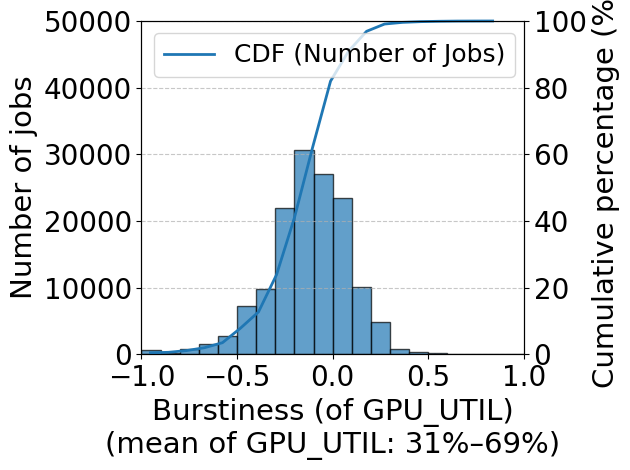

In [7]:
burstiness_values = gputil_burstiness_30_70["burstiness_score"].dropna()
hist_values, bin_edges = np.histogram(burstiness_values, bins=20)

cumulative_values = np.cumsum(hist_values)
cdf = (cumulative_values / cumulative_values[-1]) * 100

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

fig, ax1 = plt.subplots()
ax1.hist(burstiness_values, bins=20, range=(-1, 1),  edgecolor='black', alpha=0.7)
ax1.set_xlabel("Burstiness (of GPU_UTIL)\n(mean of GPU_UTIL: 31%–69%)", fontsize=21)
ax1.set_ylabel("Number of jobs", fontsize=21)
ax1.set_xticks([-1, -0.5, 0, 0.5, 1.0])
ax1.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
ax1.set_xlim(-1, 1)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2 = ax1.twinx()
ax2.plot(bin_centers, cdf, label='CDF (Number of Jobs)', linewidth=2, clip_on=False)
ax2.set_ylabel('Cumulative percentage (%)', fontsize=21)
ax2.set_ylim(0, 100)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_yticks([0, 20, 40, 60, 80, 100])

plt.legend(loc="upper left", fontsize=18)

plt.tight_layout()
plt.show()

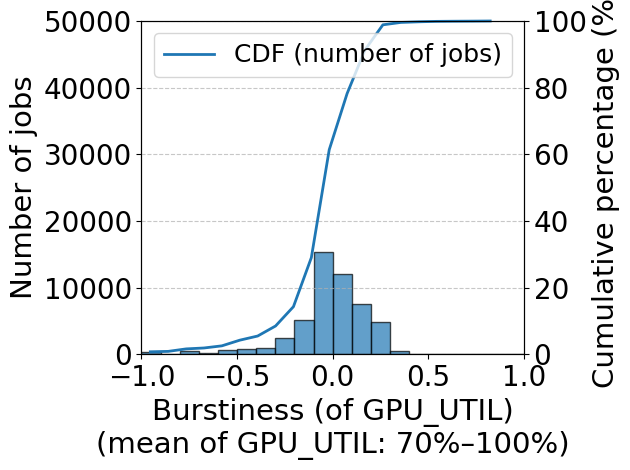

In [8]:
burstiness_values = gputil_burstiness_70["burstiness_score"].dropna()
hist_values, bin_edges = np.histogram(burstiness_values, bins=20)

cumulative_values = np.cumsum(hist_values)
cdf = (cumulative_values / cumulative_values[-1]) * 100

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

fig, ax1 = plt.subplots()
ax1.hist(burstiness_values, bins=20, range=(-1, 1), edgecolor='black', alpha=0.7)
ax1.set_xlabel("Burstiness (of GPU_UTIL)\n(mean of GPU_UTIL: 70%–100%)", fontsize=21)
ax1.set_ylabel("Number of jobs", fontsize=21)
ax1.set_xticks([-1, -0.5, 0, 0.5, 1.0])
ax1.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
ax1.set_xlim(-1, 1)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2 = ax1.twinx()
ax2.plot(bin_centers, cdf, label='CDF (number of jobs)', linewidth=2, clip_on=False)
ax2.set_ylabel('Cumulative percentage (%)', fontsize=21)
ax2.set_ylim(0, 100)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_yticks([0, 20, 40, 60, 80, 100])

plt.legend(loc="upper left", fontsize=18)

plt.tight_layout()
plt.show()